In [ ]:
# Charge les données
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_data = """rownames,Year,Wheat,Wages
1,1565,41,5
2,1570,45,5.05
3,1575,42,5.08
4,1580,49,5.12
5,1585,41.5,5.15
6,1590,47,5.25
7,1595,64,5.54
8,1600,27,5.61
9,1605,33,5.69
10,1610,32,5.78
11,1615,33,5.94
12,1620,35,6.01
13,1625,33,6.12
14,1630,45,6.22
15,1635,33,6.3
16,1640,39,6.37
17,1645,53,6.45
18,1650,42,6.5
19,1655,40.5,6.6
20,1660,46.5,6.75
21,1665,32,6.8
22,1670,37,6.9
23,1675,43,7
24,1680,35,7.3
25,1685,27,7.6
26,1690,40,8
27,1695,50,8.5
28,1700,30,9
29,1705,32,10
30,1710,44,11
31,1715,33,11.75
32,1720,29,12.5
33,1725,39,13
34,1730,26,13.3
35,1735,32,13.6
36,1740,27,14
37,1745,27.5,14.5
38,1750,31,15
39,1755,35.5,15.7
40,1760,31,16.5
41,1765,43,17.6
42,1770,47,18.5
43,1775,44,19.5
44,1780,46,21
45,1785,42,23
46,1790,47.5,25.5
47,1795,76,27.5
48,1800,79,28.5
49,1805,81,29.5
50,1810,99,30
51,1815,78,
52,1820,54,
53,1821,54,
"""

from io import StringIO
df = pd.read_csv(StringIO(csv_data))

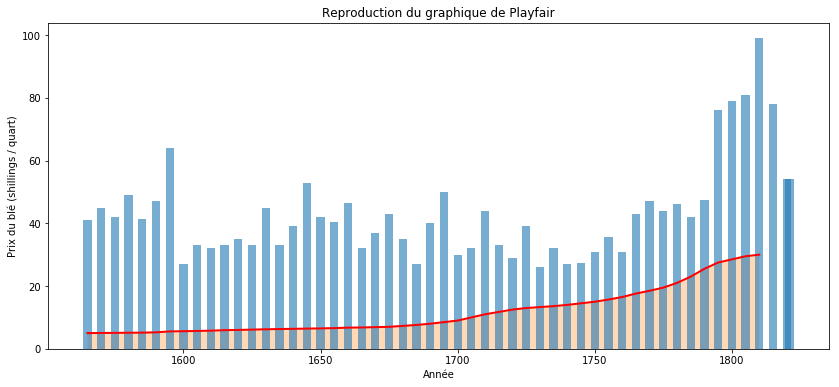

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))

# Barres des prix du blé
ax.bar(df["Year"], df["Wheat"], width=3, alpha=0.6)

# Surface pour les salaires
ax.fill_between(df["Year"], df["Wages"], alpha=0.3)

# Souligne la surface
ax.plot(df["Year"], df["Wages"], color="red", linewidth=2)

ax.set_title("Reproduction du graphique de Playfair")
ax.set_xlabel("Année")
ax.set_ylabel("Prix du blé (shillings / quart)")

plt.show()

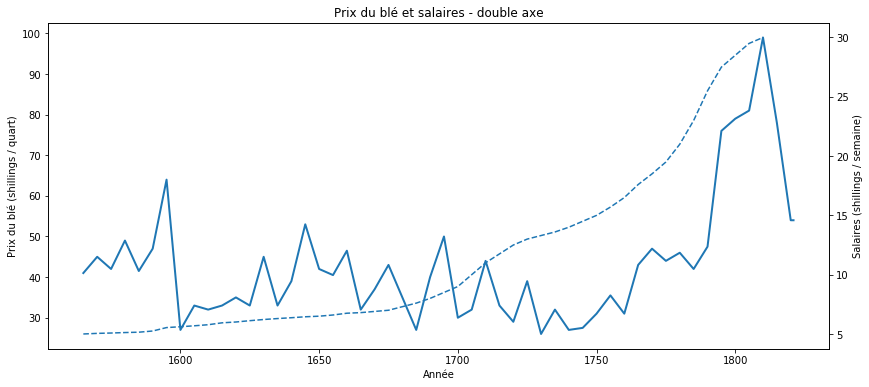

In [18]:
fig, ax1 = plt.subplots(figsize=(14,6))

x = df["Year"]

# Premier axe : prix du blé
ax1.plot(x, df["Wheat"], linewidth=2)
ax1.set_ylabel("Prix du blé (shillings / quart)")

# Deuxieme axe: salaire hebdomadaire
ax2 = ax1.twinx()
ax2.plot(x, df["Wages"], linestyle="--")
ax2.set_ylabel("Salaires (shillings / semaine)")

ax1.set_title("Prix du blé et salaires - double axe")
ax1.set_xlabel("Année")

plt.show()

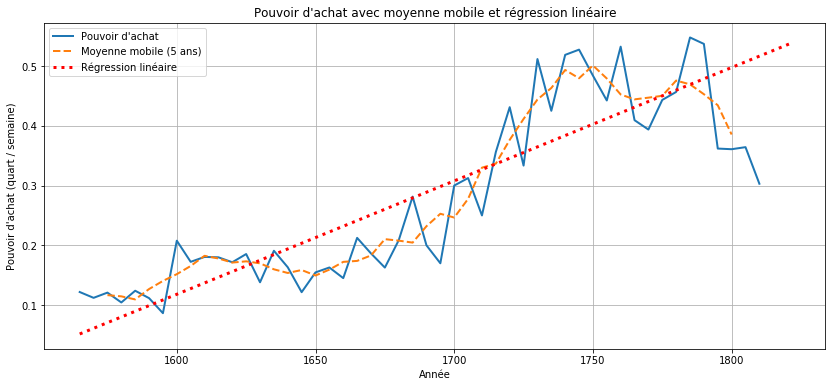

In [26]:
from scipy.stats import linregress

# On dit que le pouvoir d'achat c'est combien de quart de blé on achète avec une semaine de salaire
df["PurchasingPower"] = df["Wages"] / df["Wheat"]

# Moyenne mobile 5
df["PurchasingPower_MA"] = df["PurchasingPower"].rolling(window=5, center=True).mean()

# Regression lineaire
mask = df["PurchasingPower_MA"].notnull()
slope, intercept, r_value, p_value, std_err = linregress(df["Year"][mask], df["PurchasingPower_MA"][mask])
regression_line = intercept + slope * df["Year"]

# Graphique
plt.figure(figsize=(14,6))
plt.plot(df["Year"], df["PurchasingPower"], label="Pouvoir d'achat", linewidth=2)
plt.plot(df["Year"], df["PurchasingPower_MA"], label="Moyenne mobile (5 ans)", linewidth=2, linestyle="--")
plt.plot(df["Year"], regression_line, label="Régression linéaire", linewidth=3, color="red", linestyle=":")

plt.title("Pouvoir d'achat avec moyenne mobile et régression linéaire")
plt.xlabel("Année")
plt.ylabel("Pouvoir d'achat (quart / semaine)")
plt.legend()
plt.grid(True)
plt.show()

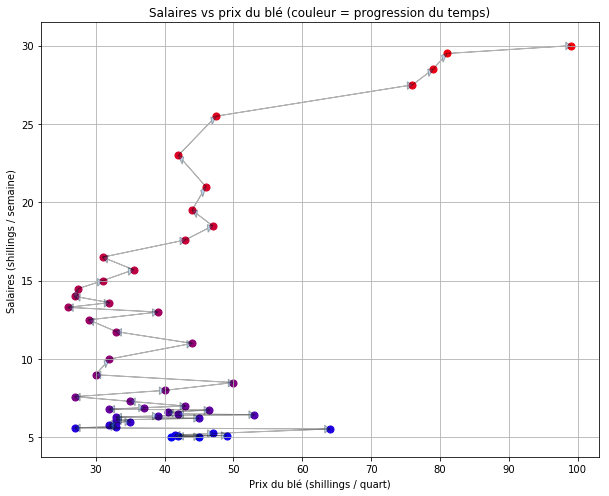

In [20]:
years = df["Year"].values
wheat = df["Wheat"].values
wages = df["Wages"].values

# Normalisation 
t = (years - years.min()) / float(years.max() - years.min())

plt.figure(figsize=(10, 8))

for i in range(len(df)):
    plt.scatter(wheat[i], wages[i], c=[[t[i], 0, 1-t[i]]], s=50)

# Fleches pour montrer la progression temporelle
for i in range(len(df)-1):
    plt.arrow(wheat[i], wages[i],
              wheat[i+1] - wheat[i],
              wages[i+1] - wages[i],
              length_includes_head=True, head_width=0.5, alpha=0.3)

plt.xlabel("Prix du blé (shillings / quart)")
plt.ylabel("Salaires (shillings / semaine)")
plt.title("Salaires vs prix du blé (couleur = progression du temps)")
plt.grid(True)
plt.show()